## News Articles Classification using NLP

A news article discusses current or recent news of either general interest or on a specific topic. We must have seen the news divided into categories when we go to a news website. Some of the popular categories that you’ll see on almost any news website are tech, entertainment, sports, etc.

Every news website classifies the news article before publishing it so that every time visitors visit their website can easily click on the type of news that interests them. Currently, the news articles are classified by hand by the content managers of news websites. But to save time, they can also implement a machine learning model on their websites that reads the news headline or the content of the news and classifies the category of the news.
In this two episode series we will understand how the text classification works using different methods along with sentiment analysis of the articles. In the process we will learn about various other tasks that can be performed using NLP like Text Summarisation, Question Answering and Machine Translation.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import all the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Import Dataset

In [5]:
dataset = pd.read_csv("/content/drive/MyDrive/NLP/News.csv")
dataset.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


## Let's do a basic Hygiene Check

### Dimension of the Data

In [6]:
dataset.shape

(1490, 3)

### Information of the Dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


### Unique Categories of News Articles

In [8]:
dataset['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

### Let's Convert the Category into Numeric Form

In [9]:
print(dataset['Category'].unique())

dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

['business' 'tech' 'politics' 'sport' 'entertainment']


,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [10]:
dataset[['Category', 'CategoryId']].drop_duplicates().reset_index(drop=True).sort_values('CategoryId')

,Category,CategoryId
0,business,0
1,tech,1
2,politics,2
3,sport,3
4,entertainment,4


## Let's Perform EDA on the Data

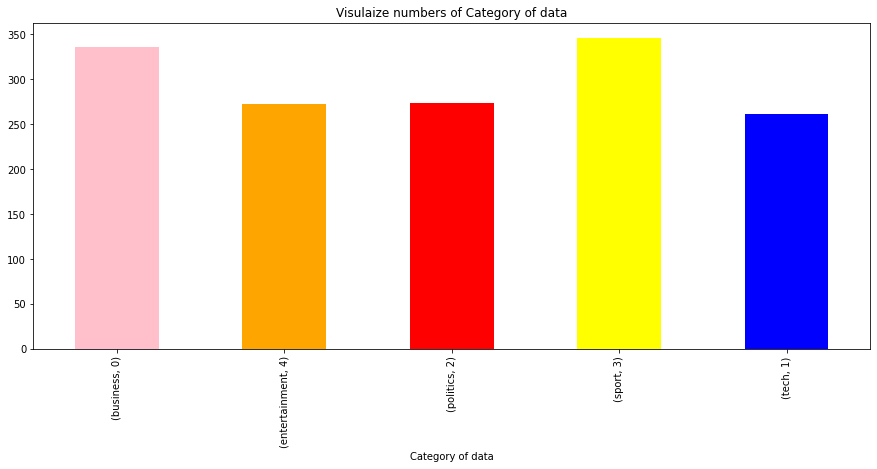

In [11]:
plt.figure(figsize=(15,6))
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

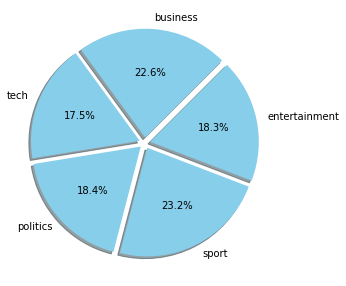

In [12]:
fig = plt.figure(figsize = (15,5))
colors = ["skyblue"]
business = dataset[dataset['CategoryId'] == 0 ]
tech = dataset[dataset['CategoryId'] == 1 ]
politics = dataset[dataset['CategoryId'] == 2]
sport = dataset[dataset['CategoryId'] == 3]
entertainment = dataset[dataset['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

### UDF for Wordcloud

In [14]:
from wordcloud import WordCloud
stop = set(stopwords.words('english'))

def wordplot(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split()
                             if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords = stop,
                          background_color = color,
                          width = 2500, height = 2500).generate(cleaned_word)
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

### Wordcloud for Business Category

Business related Words:


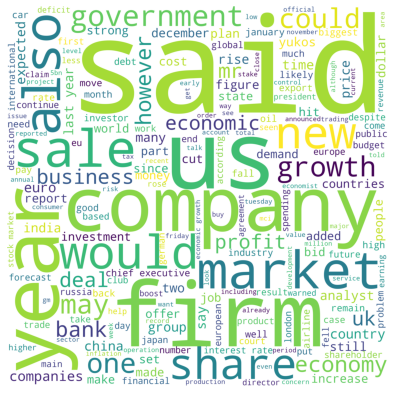

In [15]:
business = dataset[dataset['CategoryId'] == 0]
business = business['Text']

print("Business related Words:")
wordplot(business, 'white')

### Wordcloud for Tech Category

Tech related Words:


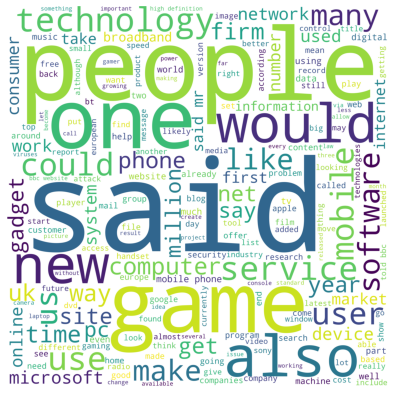

In [16]:
tech = dataset[dataset['CategoryId'] == 1]
tech = tech['Text']

print("Tech related Words:")
wordplot(tech, 'white')

### Wordcloud for Politics Category

Politics related Words:


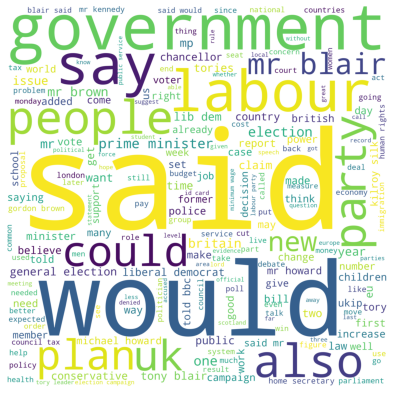

In [17]:
politics = dataset[dataset['CategoryId'] == 2]
politics = politics['Text']

print("Politics related Words:")
wordplot(politics, 'white')

### Wordcloud for Sports Category

Sports related Words:


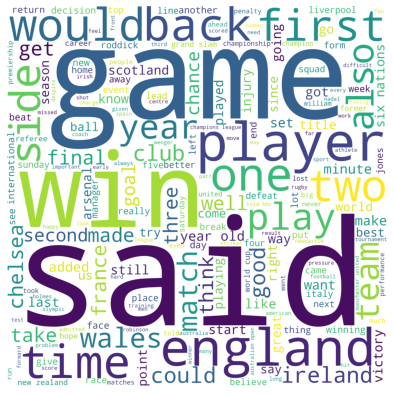

In [18]:
sport = dataset[dataset['CategoryId'] == 3]
sport = sport['Text']

print("Sports related Words:")
wordplot(sport, 'white')

### Wordcloud for Entertainment Category

Entertainment related Words:


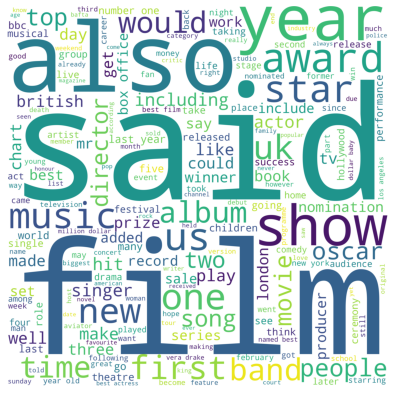

In [19]:
entertainment = dataset[dataset['CategoryId'] == 4]
entertainment = entertainment['Text']

print("Entertainment related Words:")
wordplot(entertainment, 'white')

## Let's Clean the Data

In [20]:
# Remove Tags
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)

dataset['Text'] = dataset['Text'].apply(remove_tags)

In [21]:
# Remove Special Characters
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews

dataset['Text'] = dataset['Text'].apply(special_char)

In [22]:
# Convert to Lower Case
def convert_lower(text):
   return text.lower()

dataset['Text'] = dataset['Text'].apply(convert_lower)
dataset['Text'][1]

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy   munich based research institute ifo said that its confidence index fell to 95 5 in february from 97 5 in january  its first decline in three months  the study found that the outlook in both the manufacturing and retail sectors had worsened  observers had been hoping that a more confident business sector would signal that economic activity was picking up    we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner   the main reason is probably that the domestic economy is still weak  particularly in the retail trade   economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline   he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue   germany s economy grew 1 

In [23]:
# Remove Stopwords
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]

dataset['Text'] = dataset['Text'].apply(remove_stopwords)
dataset['Text'][1]

['german',
 'business',
 'confidence',
 'slides',
 'german',
 'business',
 'confidence',
 'fell',
 'february',
 'knocking',
 'hopes',
 'speedy',
 'recovery',
 'europe',
 'largest',
 'economy',
 'munich',
 'based',
 'research',
 'institute',
 'ifo',
 'said',
 'confidence',
 'index',
 'fell',
 '95',
 '5',
 'february',
 '97',
 '5',
 'january',
 'first',
 'decline',
 'three',
 'months',
 'study',
 'found',
 'outlook',
 'manufacturing',
 'retail',
 'sectors',
 'worsened',
 'observers',
 'hoping',
 'confident',
 'business',
 'sector',
 'would',
 'signal',
 'economic',
 'activity',
 'picking',
 'surprised',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidensteiner',
 'main',
 'reason',
 'probably',
 'domestic',
 'economy',
 'still',
 'weak',
 'particularly',
 'retail',
 'trade',
 'economy',
 'labour',
 'minister',
 'wolfgang',
 'clement',
 'called',
 'dip',
 'february',
 'ifo',
 'confidence',
 'figure',
 'mild',
 'decline',
 'said',
 'despite',
 'r

In [24]:
# Lemmatizing Words
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])

dataset['Text'] = dataset['Text'].apply(lemmatize_word)
dataset['Text'][1]

'german business confidence slide german business confidence fell february knocking hope speedy recovery europe largest economy munich based research institute ifo said confidence index fell 95 5 february 97 5 january first decline three month study found outlook manufacturing retail sector worsened observer hoping confident business sector would signal economic activity picking surprised ifo index taken knock said dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement called dip february ifo confidence figure mild decline said despite retreat index remained relatively high level expected modest economic upswing continue germany economy grew 1 6 last year shrinking 2003 however economy contracted 0 2 last three month 2004 mainly due reluctance consumer spend latest indication growth still proving elusive ifo president han werner sinn said improvement german domestic demand sluggish export

In [25]:
# Final Data after cleaning
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex bos launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen majo...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,1
4,917,enron boss 168m payout eighteen former enron d...,business,0


### Converting the Data into a Vector of Bag of Words

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)

cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 5000)
y.shape =  (1490,)


### Let's Split the Data for Fitting Models

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, shuffle = True)

print(len(x_train))
print(len(x_test))

1043
447


### Fitting the Models

In [28]:
#create list of model and accuracy dicts

perform_list = [ ]

def run_model(model_name):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    # elif model_name == 'K Nearest Neighbour':
    #     mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()

    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    
    print(f'Test Accuracy Score of Basic {model_name} {accuracy}%')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([('Model', model_name),('Test Accuracy', round(accuracy, 2)),
                              ('Precision', round(precision, 2)),('Recall', round(recall, 2)),
                              ('F1', round(f1score, 2))]))

In [29]:
run_model('Logistic Regression')

Test Accuracy Score of Basic Logistic Regression 96.64%
Precision : 0.9664429530201343
Recall : 0.9664429530201343
F1-score : 0.9664429530201343


In [30]:
run_model('Random Forest')

Test Accuracy Score of Basic Random Forest 97.99%
Precision : 0.9798657718120806
Recall : 0.9798657718120806
F1-score : 0.9798657718120806


In [31]:
run_model('Multinomial Naive Bayes')

Test Accuracy Score of Basic Multinomial Naive Bayes 97.76%
Precision : 0.9776286353467561
Recall : 0.9776286353467561
F1-score : 0.9776286353467561


In [32]:
run_model('Support Vector Classifer')

Test Accuracy Score of Basic Support Vector Classifer 95.97%
Precision : 0.959731543624161
Recall : 0.959731543624161
F1-score : 0.959731543624161


In [33]:
run_model('Decision Tree Classifier')

Test Accuracy Score of Basic Decision Tree Classifier 79.42%
Precision : 0.7941834451901566
Recall : 0.7941834451901566
F1-score : 0.7941834451901566


In [36]:
# run_model('K Nearest Neighbour')

In [37]:
run_model('Gaussian Naive Bayes')

Test Accuracy Score of Basic Gaussian Naive Bayes 78.52%
Precision : 0.785234899328859
Recall : 0.785234899328859
F1-score : 0.7852348993288589


In [38]:
model_performance = pd.DataFrame(data=perform_list)
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,96.64,0.97,0.97,0.97
1,Random Forest,97.99,0.98,0.98,0.98
2,Multinomial Naive Bayes,97.76,0.98,0.98,0.98
3,Support Vector Classifer,95.97,0.96,0.96,0.96
4,Decision Tree Classifier,79.42,0.79,0.79,0.79
5,Gaussian Naive Bayes,78.52,0.79,0.79,0.79


### Let's use the Best Model to predict a sample

In [39]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)

In [40]:
y_pred1 = cv.transform(['I want to thank the BCCI for giving me the opportunity to lead my country for such a long period of time and more importantly to all the teammates who bought into the vision I had for the team from day one and never gave up in any situation. You guys have made this journey so memorable and beautiful'])
y_pred2 = cv.transform(['Investment bankers and bureaucrats are burning the midnight oil in their race against the clock to ensure that the country’s premier insurer Life Insurance Corporation of India (LIC) offering hits the primary market by the end of this financial year'])

In [41]:
pred = classifier.predict(y_pred2)

result = ""
if pred == [0]:
  result = "Business News"
elif pred == [1]:
  result = "Tech News"
elif pred == [2]:
  result = "Politics News"
elif pred == [3]:
  result = "Sports News"
elif pred == [1]:
  result = "Entertainment News"

print(result)

Business News


In [42]:
pred = classifier.predict(y_pred1)

result = ""
if pred == [0]:
  result = "Business News"
elif pred == [1]:
  result = "Tech News"
elif pred == [2]:
  result = "Politics News"
elif pred == [3]:
  result = "Sports News"
elif pred == [1]:
  result = "Entertainment News"

print(result)

Sports News


## Contd to Part 2......